In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.utils import util
from mejiro.instruments.hwo import HWO
from mejiro.synthetic_image import SyntheticImage
from mejiro.lenses.test import SampleStrongLens
from mejiro.exposure import Exposure

In [2]:
hwo = HWO()
lens = SampleStrongLens()

In [3]:
synth = SyntheticImage(lens, hwo, 'J', arcsec=5., oversample=1)

Computing on pixel grid of size 125x125 (5.0"x5.0") with pixel scale 0.04 arcsec/pixel (natively 0.04 arcsec/pixel oversampled by factor 1)
Initialized SyntheticImage for StrongLens None by HWO in J band


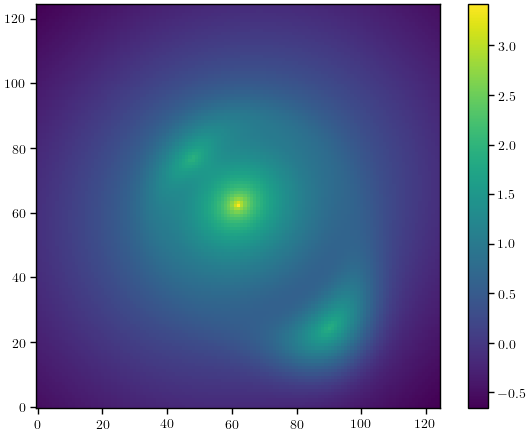

In [4]:
plt.imshow(np.log10(synth.image))
plt.colorbar()
plt.show()

In [5]:
exposure = Exposure(synth, exposure_time=180)

PSF FWHM: 0.031707026009064


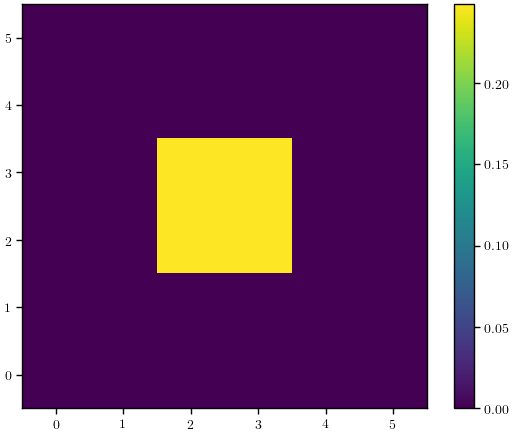

In [6]:
gaussian_psf = exposure.psf_image.array

plt.imshow(gaussian_psf)
plt.colorbar()
plt.show()

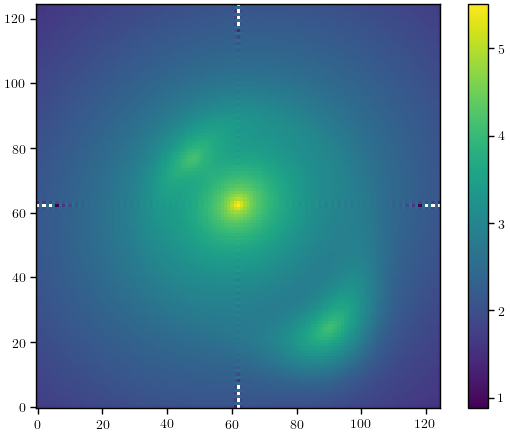

In [7]:
plt.imshow(np.log10(exposure.exposure))
plt.colorbar()
plt.show()